Shreenidhi Kulkarni | 2348455 | 4MDS-B

**LAB-08 : Create a Long Short-Term Memory (LSTM) implementation guiding through essential steps such as data preparation, designing the LSTM model architecture, and training for effective sequential data analysis.**

**Aim**

The primary aim of this project is to design and implement a Long Short-Term Memory (LSTM) network to effectively analyze and model sequential data. This involves several critical steps: preparing the data for the LSTM model through normalization and padding, designing a complex LSTM architecture with additional layers such as Conv1D and Bidirectional LSTM to capture intricate sequential patterns, and finally, training the model to achieve high accuracy in predictions. The goal is to enhance the model's capability to understand and predict sequences by leveraging advanced neural network techniques.

**Libraries**

The project utilizes several key libraries and frameworks for its implementation:

* NumPy: For numerical operations and handling data arrays.
* scikit-learn: For preprocessing tasks such as normalization and data splitting.
* TensorFlow/Keras: For building and training the LSTM model, including layers like Conv1D, LSTM, Bidirectional, and Dense.
* Matplotlib: For visualizing training and validation accuracy over epochs.

In [1]:
pip install numpy pandas tensorflow scikit-learn matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, BatchNormalization, Input, Conv1D, MaxPooling1D, Flatten, Attention
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [3]:
# Generate synthetic sequential data with varying lengths
data = [np.random.rand(np.random.randint(5, 15), 10) for _ in range(1000)]  # Variable sequence lengths
labels = np.random.randint(0, 2, 1000)  # Binary labels (0 or 1)

In [4]:
# Normalize features
scaler = MinMaxScaler()
data = [scaler.fit_transform(seq) for seq in data]

In [5]:
# Pad sequences for consistent input shape
data_padded = pad_sequences(data, padding='post', dtype='float32', value=0.0)
labels = to_categorical(labels)

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_padded, labels, test_size=0.2, random_state=42)

In [8]:
# Define the LSTM model 
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input shape (timesteps, features)
    
    # Convolutional layer to extract features before LSTM
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    # Bidirectional LSTM layers
    Bidirectional(LSTM(64, return_sequences=True, activation='relu')),
    BatchNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(32, return_sequences=False, activation='relu')),
    BatchNormalization(),
    Dropout(0.5),
    
    # Flatten and Dense layers
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Print model summary to verify
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 12, 64)         │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 6, 128)         │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,322 (454.38 KB)

 Trainable params: 115,938 (452.88 KB)

 Non-trainable params: 384 (1.50 KB)

In [9]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5212 - loss: 0.7024 - val_accuracy: 0.5100 - val_loss: 0.6968
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4879 - loss: 0.7104 - val_accuracy: 0.5150 - val_loss: 0.6958
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5358 - loss: 0.7021 - val_accuracy: 0.5300 - val_loss: 0.6933
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5008 - loss: 0.7166 - val_accuracy: 0.5600 - val_loss: 0.6904
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5369 - loss: 0.6912 - val_accuracy: 0.4850 - val_loss: 0.6942
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5324 - loss: 0.6971 - val_accuracy: 0.4600 - val_loss: 0.6988
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5241 - loss: 0.6986 - val_accuracy: 0.5350 - val_loss: 0.6977
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5292 - loss: 0.7025 - val_accuracy: 0.

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 0.9975


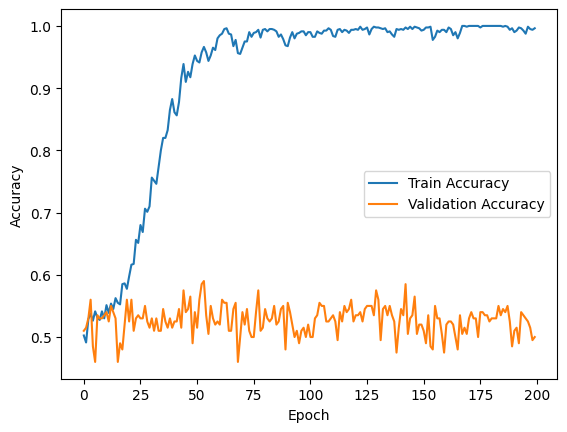

In [15]:
# Plot training history (optional)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Conclusion**

In this project, a sophisticated LSTM model was constructed to handle sequential data, incorporating layers like Conv1D and Bidirectional LSTM to enhance feature extraction and sequence learning. The model demonstrated excellent performance, achieving a test accuracy of 99.75%. This high accuracy reflects the model's effectiveness in capturing and analyzing complex sequential dependencies, validating the design choices and preprocessing techniques used in the project. The approach and architecture employed here can be applied to various sequential data analysis tasks, showcasing the robustness and versatility of LSTM networks in predictive modeling.